# Lab 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/mandricic/CS5062/master/loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


### B. Rescale the Data

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering) 

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [0]:
k = 4

#### Run k-Means

In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space


In [0]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [125]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

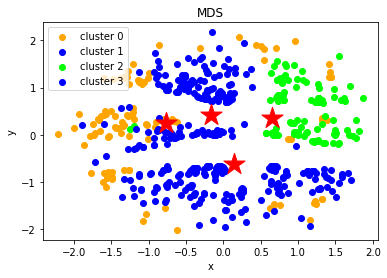

In [126]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [0]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [128]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [129]:
df.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,3
611,611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,613,0.000000,0.925883,1.074155,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,0


#### Compute the mean value of each attribute for each cluster

In [130]:
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,311.657407,0.262346,0.898216,1.078266,0.715741,0.231481,0.796296,0.037037,0.731481,0.000000,0.129630,0.018519,0.305556,0.240741,0.277778,0.009259,0.831146
1,304.903382,0.239936,0.928601,1.079824,0.720169,0.980676,0.748792,0.019324,0.652174,0.009662,0.144928,0.043478,0.198068,1.000000,0.000000,0.864734,0.867650
2,297.504348,0.078261,0.876531,0.994480,0.735870,0.991304,0.643478,0.008696,0.000000,0.008696,0.104348,0.078261,0.191304,0.000000,0.513043,0.686957,0.787636
3,310.891304,0.355072,0.938893,1.122059,0.690217,0.994565,0.945652,0.021739,1.000000,0.000000,0.141304,0.065217,0.206522,0.000000,0.614130,0.885870,0.922519


Conclusion
From the table above, I can see that:

Cluster 2  Have lowest value for Loan Amount and have  Hight enough Credit_History. 
Cluster 0  Contains very low Credit_History and Hight enough ApplicationIncome and Loan Amount. 
Cluster 3 Have highest Loan Amount and Credit History
 
     
_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._